<a href="https://colab.research.google.com/github/ekarf/med_buzzer_proj_embedded/blob/main/fourier_and_laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy scipy matplotlib


Saving sensor_data_fourier.csv to sensor_data_fourier.csv


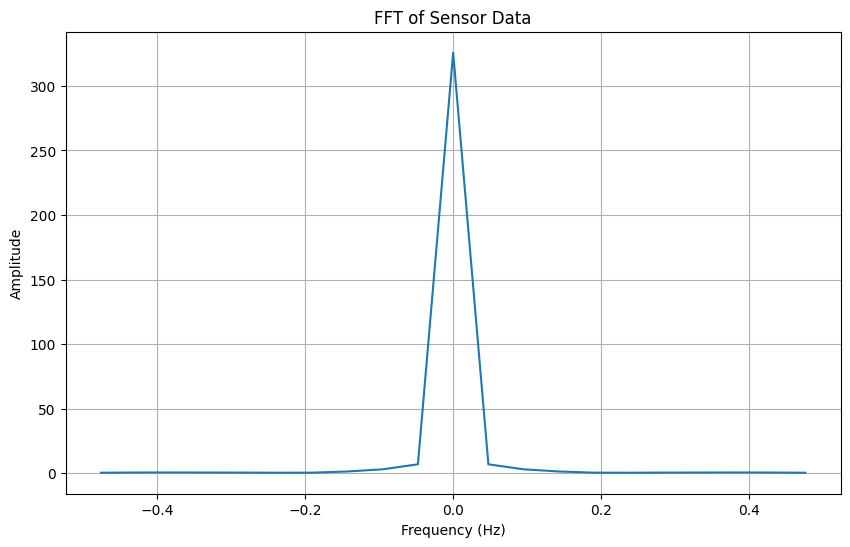

The dominant frequency is approximately 0.00 Hz


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Upload and read the CSV file (use the 'Upload' button in Colab)
from google.colab import files
uploaded = files.upload()

# Assuming the uploaded file is named 'sensor_data.csv'
data = pd.read_csv('sensor_data_fourier.csv')  # Replace with your uploaded file name

# Extract the 'Time' and 'Distance' columns
time = data['Time'].values
sensor_data = data['Distance'].values

# Perform Fast Fourier Transform (FFT)
N = len(sensor_data)  # Length of the data
T = time[1] - time[0]  # Sampling rate (difference in time between samples)
x = np.linspace(0.0, N*T, N, endpoint=False)  # Time vector

# Perform FFT
y = np.fft.fft(sensor_data)
xf = np.fft.fftfreq(N, T)  # Frequency bins
xf = np.fft.fftshift(xf)  # Shift the frequencies to center around 0
y = np.fft.fftshift(y)  # Shift the result

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(xf, np.abs(y))
plt.title('FFT of Sensor Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Identify dominant frequency
dominant_freq = np.abs(xf[np.argmax(np.abs(y))])
print(f"The dominant frequency is approximately {dominant_freq:.2f} Hz")


Saving sensor_data_laplace.csv to sensor_data_laplace (1).csv


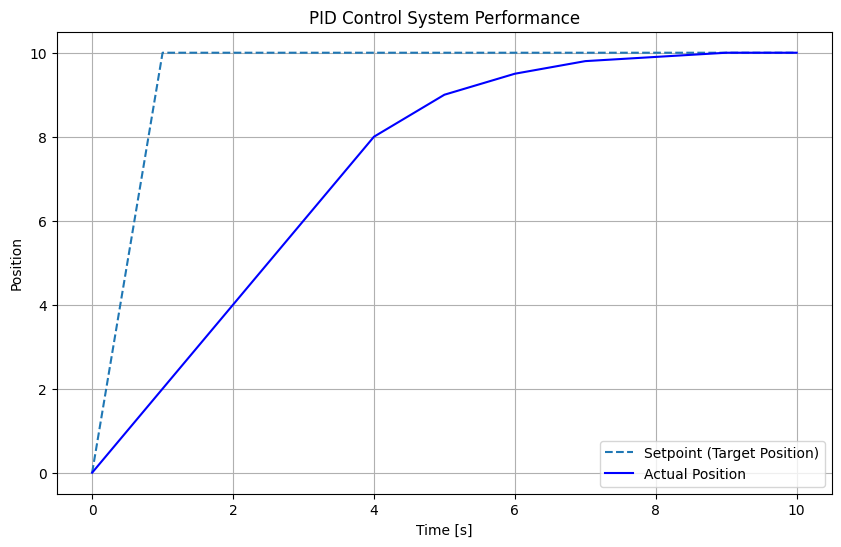

Zeros: [-19.89949494  -0.10050506]
Poles: [0. 0.]
Gain: 0.05


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Upload and read the CSV file (use the 'Upload' button in Colab)
from google.colab import files
uploaded = files.upload()

# Assuming the uploaded file is named 'sensor_data_laplace.csv'
data = pd.read_csv('sensor_data_laplace.csv')  # Replace with your uploaded file name

# Extract the Time, Setpoint, and ActualPosition columns
time = data['Time'].values
setpoint = data['Setpoint'].values
actual_position = data['ActualPosition'].values

# PID constants (for tuning)
Kp = 1.0  # Proportional gain
Ki = 0.1  # Integral gain
Kd = 0.05  # Derivative gain

# Create the transfer function for the PID controller
num = [Kd, Kp, Ki]  # Numerator (PID coefficients: Derivative, Proportional, Integral)
den = [1, 0, 0]  # Denominator for a first-order system: [s^2 + s + 1] (or modify as needed for your system)

# Create the transfer function (PID controller)
system = signal.TransferFunction(num, den)

# Simulate the step response of the PID controller
t, y = signal.step(system, T=time)  # System response

# Plot the setpoint vs. actual position (to visualize the PID performance)
plt.figure(figsize=(10, 6))
plt.plot(time, setpoint, label='Setpoint (Target Position)', linestyle='--')
plt.plot(time, actual_position, label='Actual Position', color='blue')
plt.title('PID Control System Performance')
plt.xlabel('Time [s]')
plt.ylabel('Position')
plt.legend()
plt.grid(True)
plt.show()

# Analyzing system performance
# Check the poles and zeros of the PID-controlled system
# Fix: Extract the numerator and denominator from the system object properly
zeros, poles, gain = signal.tf2zpk(num, den)  # Pass num, den directly instead of system object
print("Zeros:", zeros)
print("Poles:", poles)
print("Gain:", gain)  # Also printing the gain which is the third return value